# **Sun-as-a-star analysis of coronal high-frequency quasi-periodic oscillations observed by an iPhone during the total solar eclipse of 20 April 2023 with 240 fps imaging**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  
- `scipy==1.13.1`  


<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook 4.0**
#### img registration 1st. 
- input: *.jpg
- output: *.png, *.mp4,  and  *.fits

STEP 1: file load. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.io import fits
import skimage.io as io 
import struct
import imageio as iio
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
import cv2
from PIL import Image

In [47]:
path0 = '/Volumes/WD1T/share/TSE2023/'                  # input dir
path1 = '/Volumes/WD1T/share/TSE2023/iPhone/result/'    # input dir
pathfd  = path0 + 'iPhone/result/dfdatat/'              # pahtfd = path with flat and dark processed

dirr1t = path1 + 'r1dfdatat/'  # r1dfdatat: registration 1st dark flat data totally
if not os.path.exists(dirr1t):
    os.makedirs(dirr1t)
    
dirr2t = path1 + 'r2dfdatat/'  # r1dfdatat: registration 1st dark flat data totally
if not os.path.exists(dirr2t):
    os.makedirs(dirr2t)
    
dirr2t_png = path1 + 'r2dfdatat_png/'  # r1dfdatat: registration 1st dark flat data totally
if not os.path.exists(dirr2t_png):
    os.makedirs(dirr2t_png)

In [48]:
# 5.0 data dark processing
pathd = dirr1t 
listd = os.listdir(pathd)
listd.sort()
print(listd[0:10])
print(len(listd))
st = 0
fn = len(listd) - st

['r1_image_00001.fits', 'r1_image_00002.fits', 'r1_image_00003.fits', 'r1_image_00004.fits', 'r1_image_00005.fits', 'r1_image_00006.fits', 'r1_image_00007.fits', 'r1_image_00008.fits', 'r1_image_00009.fits', 'r1_image_00010.fits']
13282


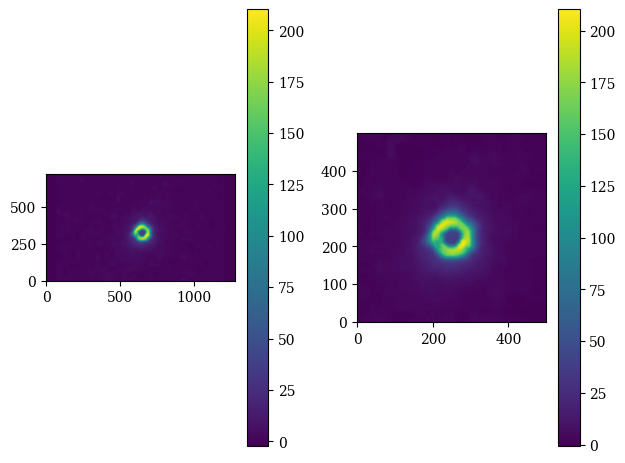

In [49]:
st1 = st + 0
hdu = fits.open(pathd + listd[st1+ 2800])
img = hdu[0].data


#sr, er, sc, ec = 200, 500, 500, 800
sr, er, sc, ec = 100, 100 + 500 , 400, 400 + 500

plt.subplot(121)
plt.imshow(img,origin = 'lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(img[sr:er, sc:ec],origin = 'lower')
plt.colorbar()
plt.tight_layout()


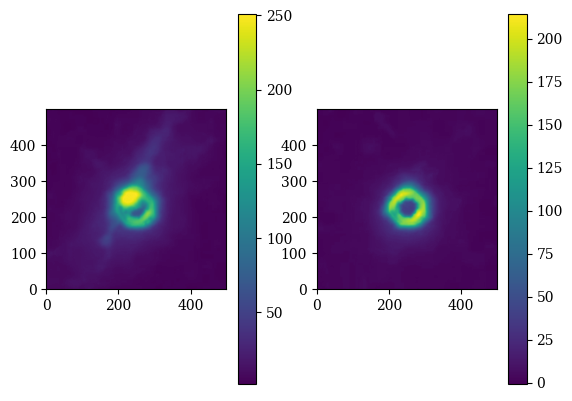

In [50]:
st1 = st + 0
hdu = fits.open(pathd + listd[st1])
img = hdu[0].data

hdu2 = fits.open(pathd + listd[st + 3282])
img2 = hdu2[0].data

plt.subplot(121)
plt.imshow(img[sr:er, sc:ec],origin = 'lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(img2[sr:er, sc:ec],origin = 'lower')
plt.colorbar()

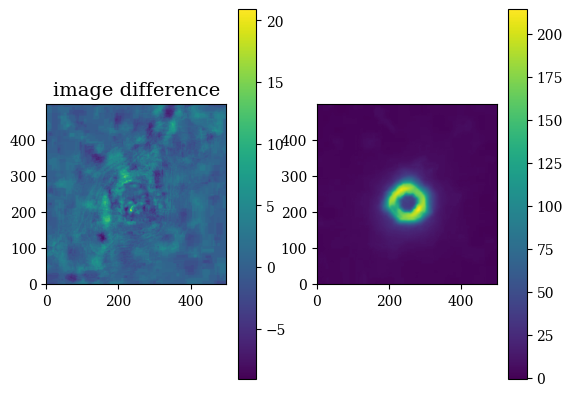

In [51]:
hdu1 = fits.open(pathd + listd[st + 0])
img1 = hdu1[0].data
image0 = img1#[sr:er, sc:ec]
hdu1 = fits.open(pathd + listd[st + 1])
img1 = hdu1[0].data
image1 = img1#[sr:er, sc:ec]
image = image1 - image0

plt.subplot(121)
plt.imshow(image[sr:er, sc:ec],origin = 'lower')
plt.title('image difference')
plt.colorbar()
plt.subplot(122)
plt.imshow(img2[sr:er, sc:ec],origin = 'lower')
plt.colorbar()


---
### **Notebook 4.0**
#### img registration 1st. 
- input: *.jpg
- output: *.png, *.mp4,  and  *.fits

STEP 2: binary the coronal file, and then registration. 

In [52]:
# binary
def binim3(inputimg,thr):     
    inputimg[np.where(inputimg > thr)] = 255
    inputimg[np.where(inputimg < thr + 1)] = 0
    return inputimg

(720, 1280)
[2.346654  2.3688414 2.3523273 2.3612738 2.355021  2.359467  2.3178155
 2.3261313 2.3303843 2.330101  2.3407276 2.3396544 2.3562272 2.3447928
 2.3513522 2.329245  2.3462842 2.3303738 2.3547132 2.3113298 2.368886
 2.2481618 3.1418025 3.3156004 3.5161145 3.6358166 3.5795856 3.6280527
 3.588027  3.6157427 3.5851743 3.6151986 3.5820844 3.6300027 3.5911632
 3.625256  3.5848544 3.6349165 3.547958  3.6704385 2.7320628 2.5720525
 2.6478636 2.6104624 2.6450396 2.620382  2.6570349 2.6265152 2.6579182
 2.6451235]
(720, 1280) >f4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


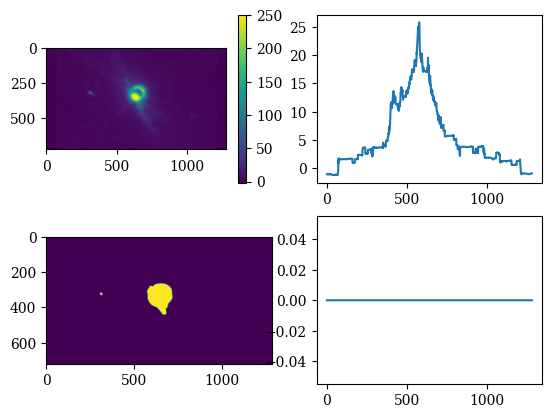

In [53]:
hdu = fits.open(pathd + listd[st + 0])
img = hdu[0].data
#bimg = binim(img)
# frame = img
# k = 5

print(img.shape)

plt.subplot(221)
plt.imshow(img)
plt.colorbar()
plt.subplot(222)
plt.plot(img[200,:])
print(img[200,200:250])
plt.subplot(223)
bimg = binim3(img, 60)
#print(T.shape, T.dtype)
print(bimg.shape, bimg.dtype)
plt.imshow(bimg)
plt.subplot(224)
plt.plot(bimg[200,:])
print(bimg[200,200:250])


[0.3936277  0.41127932 0.4021864  0.39127758 0.40395072 0.40549484
 0.3870823  0.40547347 0.4545713  0.4599249  0.4827851  0.48511437
 0.4905869  0.4971601  0.49957827 0.4997505  0.5019539  0.5087744
 0.49636135 0.49171165 0.47988793 0.4630756  0.43652725 0.44785172
 1.0391074  1.020849   1.0340828  1.043828   1.0424455  1.0358855
 1.0415463  1.0310256  1.048273   1.0485455  1.0453912  1.0373122
 1.0297378  1.0287088  1.0130309  1.0197932  1.0480347  1.029002
 1.0265803  1.031878   1.0195714  1.0229875  1.0281366  1.0219682
 1.0176309  1.011799  ]
(720, 1280) >f4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


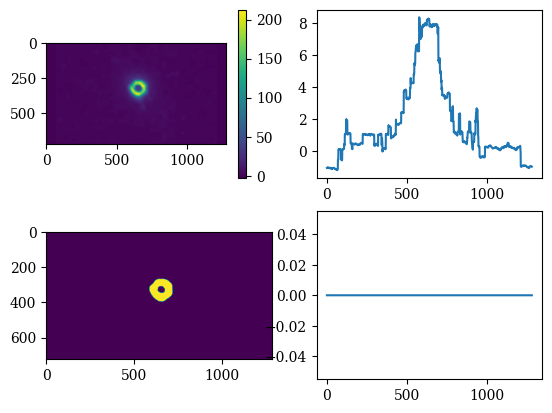

In [54]:
hdu = fits.open(pathd + listd[6000])
img = hdu[0].data

plt.subplot(221)
plt.imshow(img)
plt.colorbar()
plt.subplot(222)
plt.plot(img[200,:])
print(img[200,200:250])
plt.subplot(223)
bimg = binim3(img, 60)
#print(T.shape, T.dtype)
print(bimg.shape, bimg.dtype)
plt.imshow(bimg)
plt.subplot(224)
plt.plot(bimg[200,:])
print(bimg[200,200:250])

[1.096438   1.101433   1.1089866  1.1044264  1.0765324  1.0907738
 1.0532533  1.0494189  1.0237113  1.0257528  1.038099   1.0567482
 1.054988   1.0687573  1.076354   1.0759737  1.0792513  1.1066338
 1.0977966  1.0978125  1.0850456  1.1084334  1.0679512  1.1185712
 0.17437083 0.11650001 0.15116209 0.14607307 0.15710442 0.13887645
 0.14804052 0.11619949 0.13556273 0.15391095 0.15547183 0.15126678
 0.15486589 0.13224691 0.13366666 0.1324086  0.14561647 0.14704926
 0.16285145 0.1542291  0.15584071 0.15065114 0.1583457  0.14990808
 0.16685231 0.17262286]
(720, 1280) >f4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


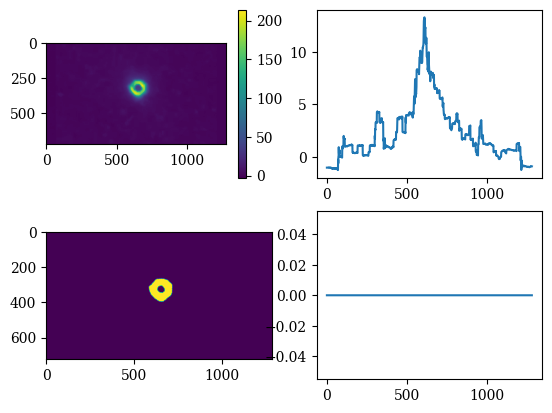

In [55]:
hdu = fits.open(pathd + listd[3282])
img = hdu[0].data

plt.subplot(221)
plt.imshow(img)
plt.colorbar()
plt.subplot(222)
plt.plot(img[200,:])
print(img[200,200:250])
plt.subplot(223)
bimg = binim3(img, 60)
#print(T.shape, T.dtype)
print(bimg.shape, bimg.dtype)
plt.imshow(bimg)
plt.subplot(224)
plt.plot(bimg[200,:])
print(bimg[200,200:250])

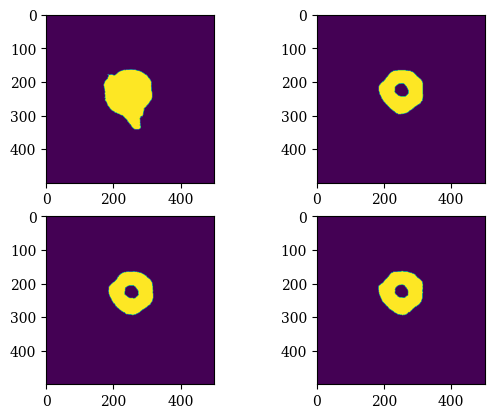

In [56]:
csr, cer, csc, cec = sr,er,sc,ec
#csr, cer, csc, cec = 150,350, 160,360

hdu = fits.open(pathd + listd[0])
img = hdu[0].data
plt.subplot(221)
plt.imshow(binim3(img[csr:cer, csc:cec],60)) 
hdu = fits.open(pathd + listd[3000])
img = hdu[0].data
plt.subplot(222)
plt.imshow(binim3(img[csr:cer, csc:cec],60)) 
hdu = fits.open(pathd + listd[6000])
img = hdu[0].data
plt.subplot(223)
plt.imshow(binim3(img[csr:cer, csc:cec],60))  
hdu = fits.open(pathd + listd[3282])
img = hdu[0].data
plt.subplot(224)
plt.imshow(binim3(img[csr:cer, csc:cec],60)) 

In [57]:
# from sklearn.decomposition import PCA, KernelPCA

# def pca_stokes(datafp,pcomp):
#     X = datafp.transpose()
#     pca = PCA(n_components= pcomp)
#     pca.fit(X)
#     pvr = pca.explained_variance_ratio_
#     plt.plot(pvr)    
#     newX = pca.fit_transform(X)
#     rnewX = pca.inverse_transform(newX) 
#     rnewXs = rnewX.transpose()
#     rnewXs.shape
#     ddata = rnewXs
#     return ddata

# ddata = pca_stokes(img, 0.90)
# ddata = ddata + np.abs(np.min(ddata))
# plt.subplot(221)
# plt.imshow(img)
# plt.colorbar()
# plt.subplot(222)
# plt.imshow(ddata)
# plt.colorbar()
# plt.subplot(223)
# plt.plot(img[200,:])
# plt.subplot(224)
# plt.plot(ddata[200,:])

In [58]:
# frame = ddata 
# image = ddata 

# k = 5
# laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=k)
# sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=k)

# sobelx= cv2.Sobel(img,0, dx=1,dy=0)
# sobelx= np.uint8(np.absolute(sobelx))

# sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=k)


# image = img
# lap = cv2.Laplacian(image,cv2.CV_64F,ksize=5) 
# #lap = np.uint8(np.absolute(lap))

# sobelx= cv2.Sobel(image,0, dx=1,dy=0)
# #sobelx= np.uint8(np.absolute(sobelx))

# sobely= cv2.Sobel(image,0, dx=0,dy=1)
# #sobely = np.uint8(np.absolute(sobely))

# plt.subplot(131) 
# plt.imshow(sobelx, cmap = 'gray',vmin = -10, vmax = 10)
# plt.subplot(132) 
# plt.imshow(sobely, cmap = 'gray',vmin = -10, vmax = 10)
# plt.subplot(133) 
# plt.imshow(laplacian, cmap = 'gray',vmin = 0, vmax = 20)

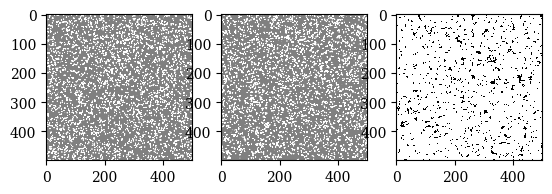

In [59]:
hdu = fits.open(pathd + listd[st + 0])
img = hdu1[0].data
img = img[sr:er, sc:ec]
frame = img[sr:er, sc:ec]

k = 5
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=k)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=k)

sobelx= cv2.Sobel(img,0, dx=1,dy=0)
sobelx= np.uint8(np.absolute(sobelx))

sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=k)


image = img
lap = cv2.Laplacian(image,cv2.CV_64F,ksize=5) 
#lap = np.uint8(np.absolute(lap))

sobelx= cv2.Sobel(image,0, dx=1,dy=0)
#sobelx= np.uint8(np.absolute(sobelx))

sobely= cv2.Sobel(image,0, dx=0,dy=1)
#sobely = np.uint8(np.absolute(sobely))

plt.subplot(131) 
plt.imshow(sobelx, cmap = 'gray',vmin = -10, vmax = 10)
plt.subplot(132) 
plt.imshow(sobely, cmap = 'gray',vmin = -10, vmax = 10)
plt.subplot(133) 
plt.imshow(laplacian, cmap = 'gray',vmin = 0, vmax = 20)

In [60]:
# cross correction test
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

fg = 1                  # file gap 
fnu = int(fn / fg)      # fnu: file name useful
print(fnu,st)

13282 0


In [61]:
pathd, listd

('/Volumes/WD1T/share/TSE2023/iPhone/result/r1dfdatat/',
 ['r1_image_00001.fits',
  'r1_image_00002.fits',
  'r1_image_00003.fits',
  'r1_image_00004.fits',
  'r1_image_00005.fits',
  'r1_image_00006.fits',
  'r1_image_00007.fits',
  'r1_image_00008.fits',
  'r1_image_00009.fits',
  'r1_image_00010.fits',
  'r1_image_00011.fits',
  'r1_image_00012.fits',
  'r1_image_00013.fits',
  'r1_image_00014.fits',
  'r1_image_00015.fits',
  'r1_image_00016.fits',
  'r1_image_00017.fits',
  'r1_image_00018.fits',
  'r1_image_00019.fits',
  'r1_image_00020.fits',
  'r1_image_00021.fits',
  'r1_image_00022.fits',
  'r1_image_00023.fits',
  'r1_image_00024.fits',
  'r1_image_00025.fits',
  'r1_image_00026.fits',
  'r1_image_00027.fits',
  'r1_image_00028.fits',
  'r1_image_00029.fits',
  'r1_image_00030.fits',
  'r1_image_00031.fits',
  'r1_image_00032.fits',
  'r1_image_00033.fits',
  'r1_image_00034.fits',
  'r1_image_00035.fits',
  'r1_image_00036.fits',
  'r1_image_00037.fits',
  'r1_image_00038.

---
### **Notebook 4.0**
#### img registration 1st. 
- input: *.jpg
- output: *.png, *.mp4,  and  *.fits

STEP 3: calculate the shift value 2nd time（Precise）, and then registration. 

In [62]:
# registration 1st
fg = 1                  # file gap 
fnu = int(fn / fg)      # fnu: file name useful
frmshift = np.zeros([2, fnu])
hdu1 = fits.open(pathd + listd[st + 3000])
img1 = hdu1[0].data
#csr, cer, csc, cec = 150,190, 180,260
image = binim3(img1[csr:cer, csc:cec],60)  
# for i in range(fnu):
#     hdu2 = fits.open(pathd + listd[st + i])
#     img2 = hdu2[0].data
#     #offset_image = pca_stokes(img2, 0.90)
#     offset_image = binim3(img2[csr:cer, csc:cec],60)  
#     shift, error, diffphase = phase_cross_correlation(image, offset_image,
#                                                 upsample_factor=100)
#     print(f'Detected shift offset (y, x) of frame',i,listd[st + i], f'is : {shift}')
#     frmshift[:, i] = shift
    
# np.save(path1 + 'refer_frmshift_2nd.npy', frmshift)
frmshift = np.load(path1 + 'refer_frmshift_2nd.npy')

(2, 13282)
-1.84203358143195 -1.50006098564694
x slope: [-3.66431447e-04  5.91254440e-01]
y slope: [-5.32079060e-04  2.03321001e+00]


/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_75142/3724258759.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_75142/3724258759.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


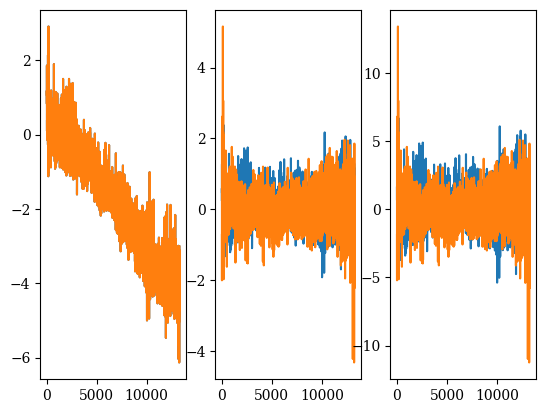

In [63]:
print(frmshift.shape)
plt.subplot(121)
plt.plot(frmshift[0,0:8000])
plt.subplot(122)
plt.plot(frmshift[1,0:8000])
print(np.mean(frmshift[0,:]), np.mean(frmshift[1,:]))


t0 = 0
dt = 1 # In seconds
# We also create a time array in years.
N = fnu
t = np.arange(0, N) * dt + t0

datx = frmshift[0,:]
daty = frmshift[1,:]

dat = datx
px = np.polyfit(t - t0, dat, 1)

dat_notrend = dat - np.polyval(px, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(datx)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('x slope:', px)

dat = daty
py = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(py, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(datx)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('y slope:', py)

x slope: [-3.66431447e-04  5.91254440e-01]
y slope: [-5.32079060e-04  2.03321001e+00]


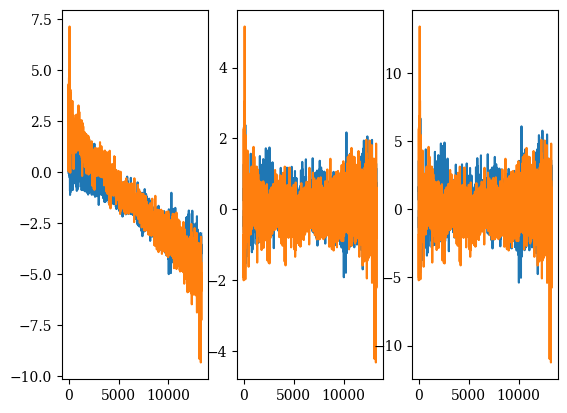

In [64]:
t0 = 0
dt = 1 # In seconds
# We also create a time array in years.
N = fnu
t = np.arange(0, N) * dt + t0

datx = frmshift[0,0:N]
daty = frmshift[1,0:N]

dat = datx
px = np.polyfit(t - t0, dat, 1)

dat_notrend = dat - np.polyval(px, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(datx)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('x slope:', px)

dat = daty
py = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(py, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(dat)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('y slope:', py)

(13282,)

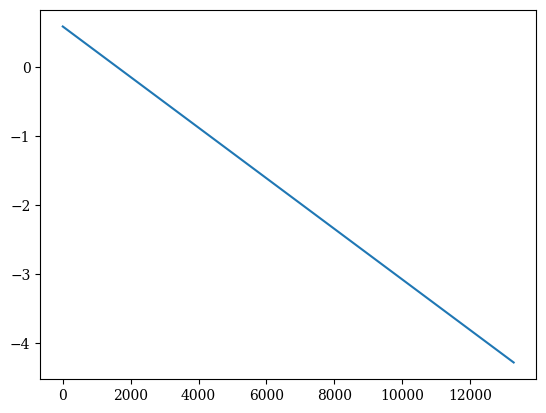

In [65]:
t0 = 0
dt = 1 # In seconds
# We also create a time array in years.
N = fnu
t = np.arange(0, N) * dt + t0

ax = np.polyval(px, t - t0)
ay = np.polyval(py, t - t0)

ax.dtype
plt.plot(ax)

ax.shape

(13282,) (13282,)


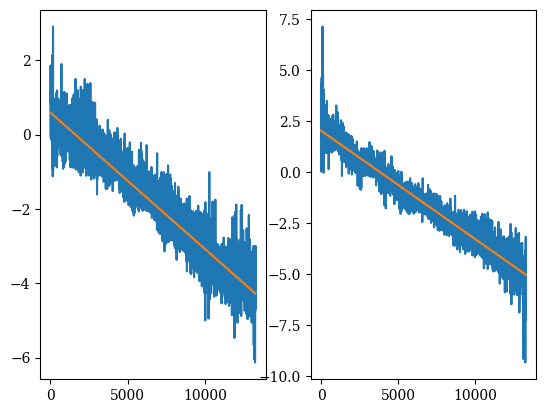

In [66]:
frmshift2 = np.zeros([2, fnu])
# dn = np.arange(fnu)
# print(dn[fnu-1])
# print(dn.size, frmshift.shape, frmshift2.shape)

frmshift2[0, :] = ax
frmshift2[1, :] = ay
# frmshift2 = np.zeros([2, fnu])

plt.subplot(121)
plt.plot(frmshift[0, :] )
plt.plot(ax)
plt.subplot(122)
plt.plot(frmshift[1, :])
plt.plot(ay)

print(ax.shape, ay.shape)
np.save(path1 + 'fit_frmshift_polyfit_2nd.npy', frmshift2)

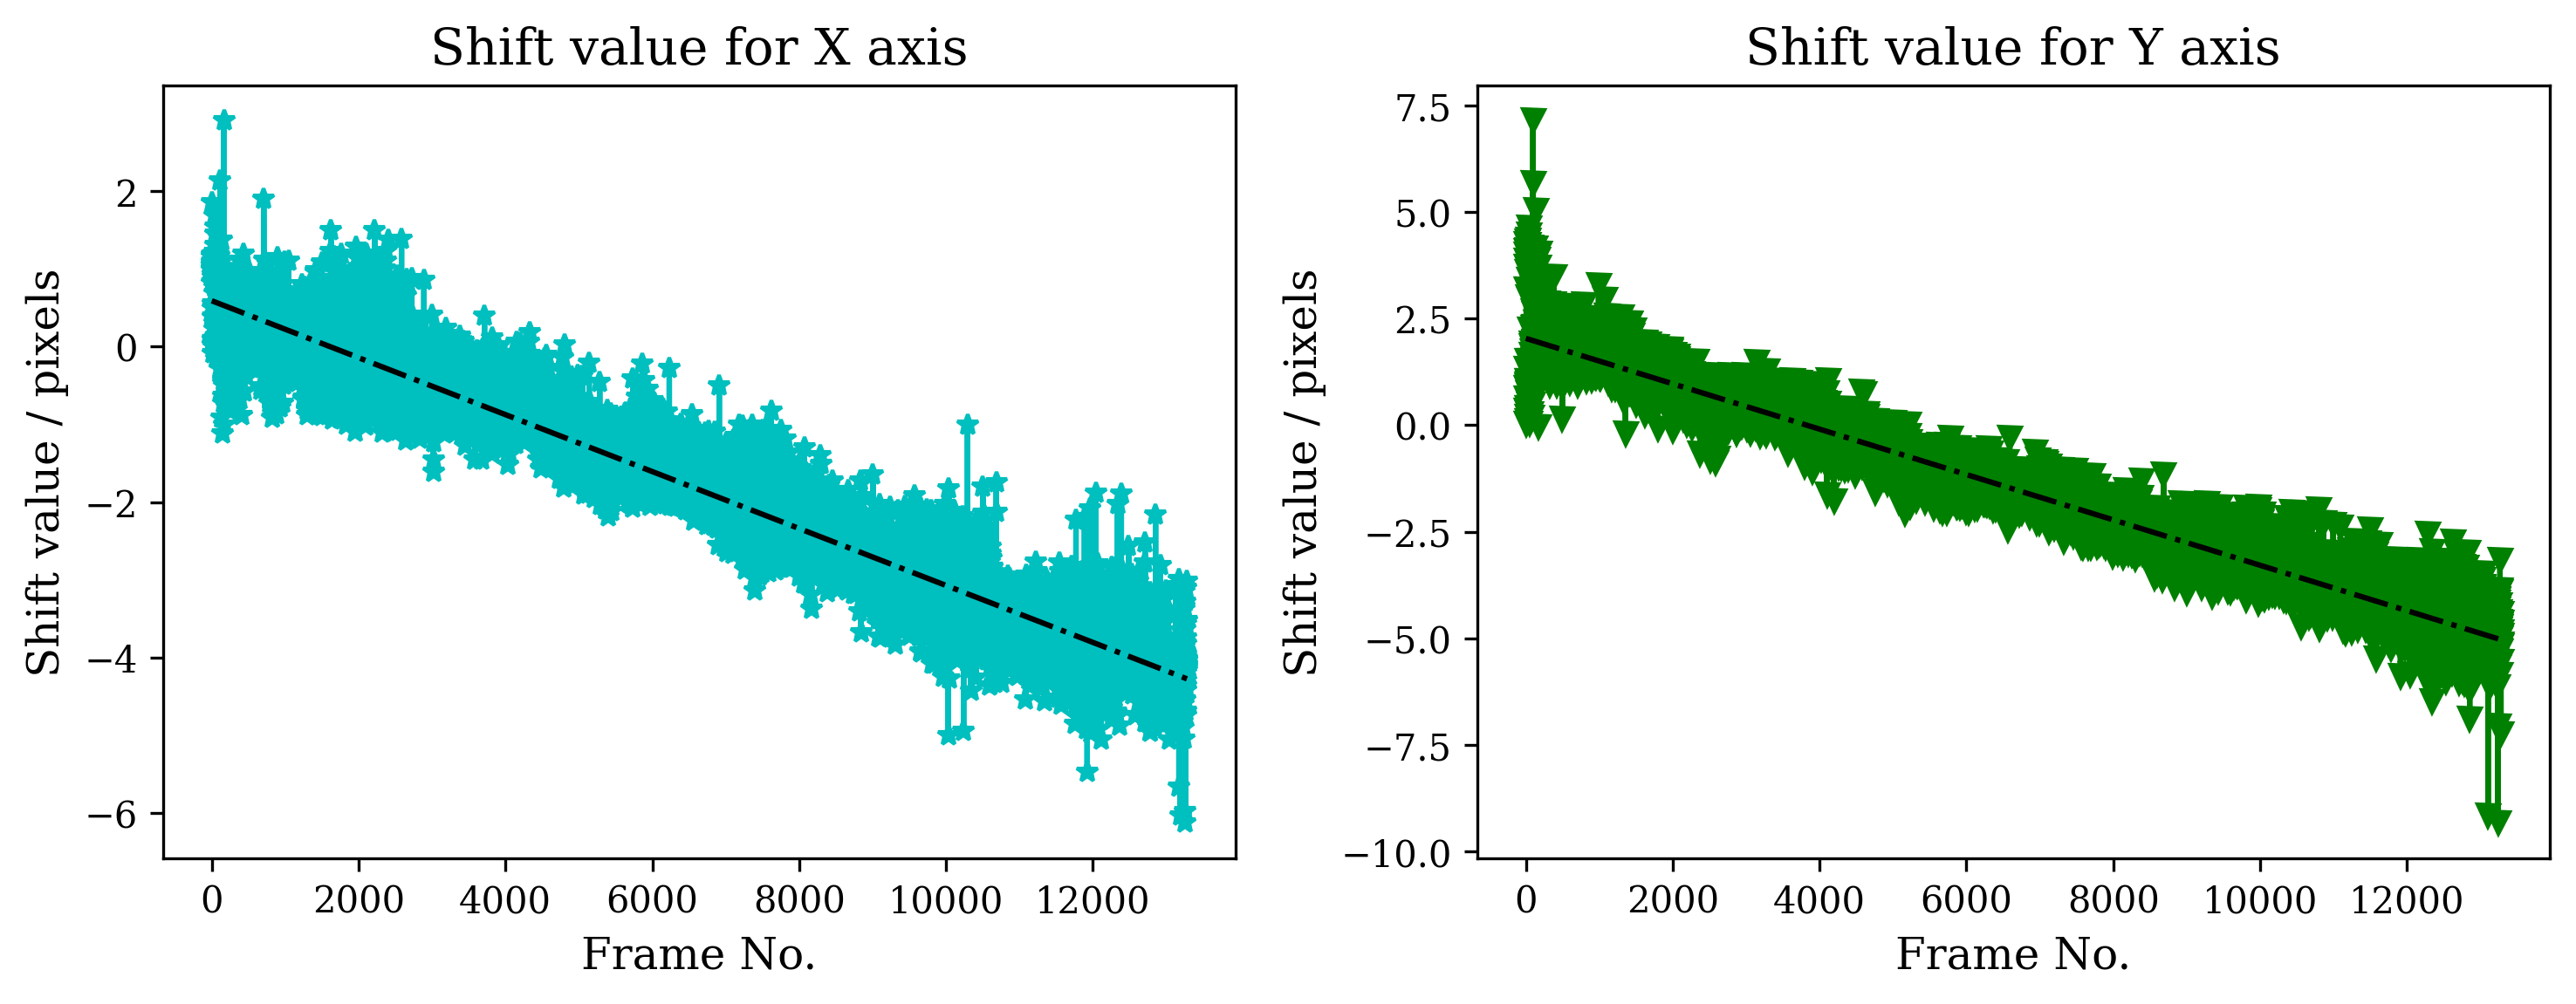

In [67]:
# 调整全局字体大小和样式以符合 Nature 风格
plt.rcParams.update({
    'font.size': 12,           # 全局字体大小
    'axes.titlesize': 14,      # 图标题字体大小
    'axes.labelsize': 12,      # 坐标轴标签字体大小
    'xtick.labelsize': 10,     # x轴刻度字体大小
    'ytick.labelsize': 10,     # y轴刻度字体大小
    'legend.fontsize': 12,     # 图例字体大小
    'figure.titlesize': 16,    # 全局标题字体大小
    'font.family': 'serif',    # 字体风格
    'mathtext.fontset': 'stix',# 数学字体与 Nature 接近
})
plt.figure(figsize=[10,4], dpi = 300)
plt.subplot(121)
plt.plot(frmshift[0, :],'c-*')
plt.plot(ax,'k-.')
plt.title('Shift value for X axis')
plt.xlabel('Frame No.')
plt.ylabel('Shift value / pixels')
plt.subplot(122)
plt.plot(frmshift[1, :],'g-v')
plt.plot(ay,'k-.')
plt.title('Shift value for Y axis')
plt.xlabel('Frame No.')
plt.ylabel('Shift value / pixels')
plt.tight_layout()
# save figure
pathfigs = './output/'
plt.savefig(pathfigs + 'fit2.png', bbox_inches='tight')
plt.show()